# Task 2: Descriptive analysis

## Preperation

In [109]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
import numpy as np
from matplotlib.ticker import PercentFormatter


# import Dataframes with cleaned data independently of the operating system (mac or windows or linux) in a pandas dataframe
charging_data_cleaned = pd.read_pickle(os.path.join('Data', 'charging_data.pkl'))
weather_data_cleaned = pd.read_pickle(os.path.join('Data', 'weather_data.pkl'))
merged_charging_weather_data = pd.read_pickle(os.path.join('Data', 'merged_charging_weather_data.pkl'))

charging_data_cleaned.head()

,counter,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs,connection_date,charging_duration,connection_duration
0,0,5e23b149f9af8b5fe4b973cf,2020-01-02 05:08:54-08:00,2020-01-02 11:11:15-08:00,2020-01-02 09:31:35-08:00,25.016,1_1_179_810_2020-01-02 13:08:53.870034,1,AG-3F30,1-1-179-810,America/Los_Angeles,194,"[{'WhPerMile': 250, 'kWhRequested': 25.0, 'mil...",2020-01-02,262.683333,362.350000
1,1,5e23b149f9af8b5fe4b973d0,2020-01-02 05:36:50-08:00,2020-01-02 14:38:21-08:00,2020-01-02 12:18:05-08:00,33.097,1_1_193_825_2020-01-02 13:36:49.599853,1,AG-1F01,1-1-193-825,America/Los_Angeles,4275,"[{'WhPerMile': 280, 'kWhRequested': 70.0, 'mil...",2020-01-02,401.250000,541.516667
2,2,5e23b149f9af8b5fe4b973d1,2020-01-02 05:56:35-08:00,2020-01-02 16:39:22-08:00,2020-01-02 08:35:06-08:00,6.521,1_1_193_829_2020-01-02 13:56:35.214993,1,AG-1F03,1-1-193-829,America/Los_Angeles,344,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile...",2020-01-02,158.516667,642.783333
3,3,5e23b149f9af8b5fe4b973d2,2020-01-02 05:59:58-08:00,2020-01-02 08:38:39-08:00,2020-01-02 07:18:45-08:00,2.355,1_1_193_820_2020-01-02 13:59:58.309319,1,AG-1F04,1-1-193-820,America/Los_Angeles,1117,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile...",2020-01-02,78.783333,158.683333
4,4,5e23b149f9af8b5fe4b973d3,2020-01-02 06:00:01-08:00,2020-01-02 14:08:40-08:00,2020-01-02 10:17:30-08:00,13.375,1_1_193_819_2020-01-02 14:00:00.779967,1,AG-1F06,1-1-193-819,America/Los_Angeles,334,"[{'WhPerMile': 400, 'kWhRequested': 16.0, 'mil...",2020-01-02,257.483333,488.650000


## a - Temporal patterns

Goal is to show the variation of the chariging sessions between day, week and season.
Lets break down the taks:
1. Create features for time
2. bring them into the rigt order
3. Create bar plots 

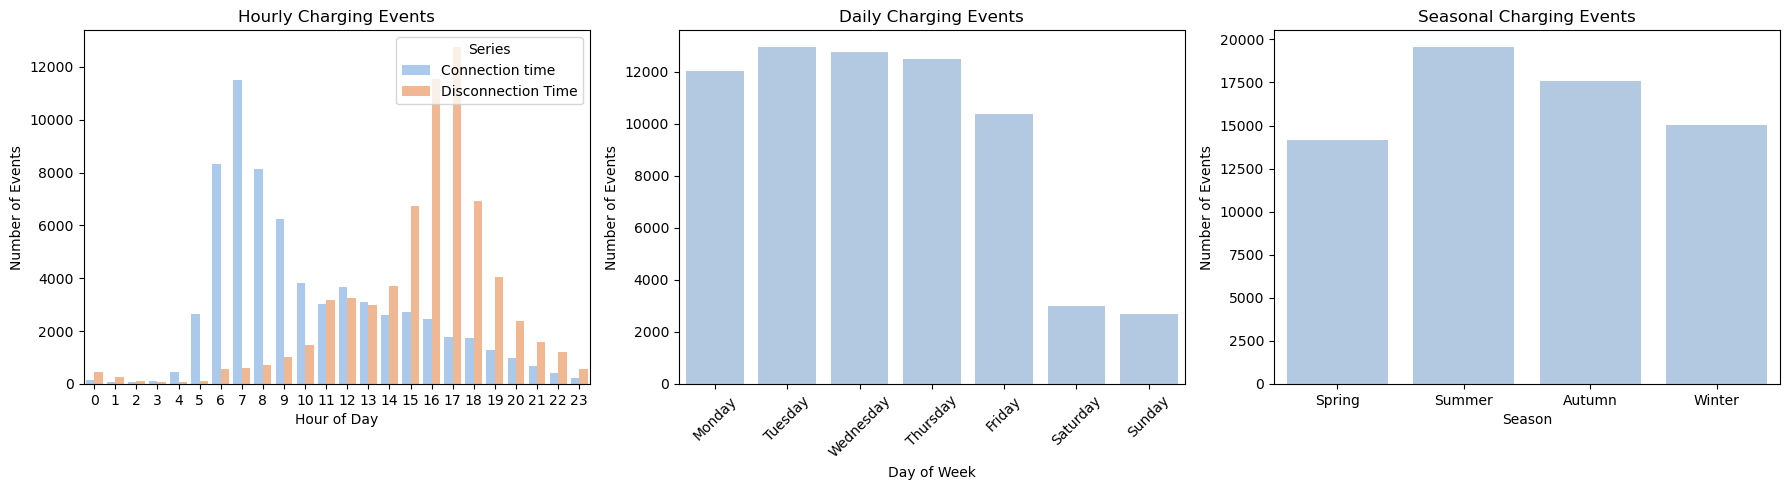

In [113]:
# Task (a): Temporal Patterns and Seasonality
# Extract time-based features

charging_data_cleaned['hourstart'] = charging_data_cleaned['connectionTime'].dt.hour
charging_data_cleaned['hourend'] = charging_data_cleaned['disconnectTime'].dt.hour

charging_data_cleaned['day_of_week'] = charging_data_cleaned['connectionTime'].dt.day_name()
charging_data_cleaned['month'] = charging_data_cleaned['connectionTime'].dt.month
charging_data_cleaned['season'] = charging_data_cleaned['month'].apply(
    lambda x: 'Winter' if x in [12, 1, 2] else 
              'Spring' if x in [3, 4, 5] else 
              'Summer' if x in [6, 7, 8] else 
              'Autumn'
)

# Aggregation for patterns
hourly_pattern_start = charging_data_cleaned.groupby('hourstart').size()
hourly_pattern_end = charging_data_cleaned.groupby('hourend').size()

daily_pattern = charging_data_cleaned.groupby('day_of_week').size()
seasonal_pattern = charging_data_cleaned.groupby('season').size()

# Sort days for correct visualization order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
month_order = ['Spring', 'Summer', 'Autumn', 'Winter']

daily_pattern = daily_pattern.reindex(day_order)
seasonal_pattern = seasonal_pattern.reindex(month_order)

df = pd.DataFrame({
    'Hour': hourly_pattern_start.index,
    'Connection time': hourly_pattern_start.values,
    'Disconnection Time': hourly_pattern_end.values
}).melt(id_vars='Hour', var_name='Series', value_name='Events')

# Plot
plt.figure(figsize=(18, 5))

# Erster Plot: Hourly Charging Events
plt.subplot(1, 3, 1)  # Subplot 1
sns.barplot(data=df, x='Hour', y='Events', hue='Series', palette='pastel')
plt.title('Hourly Charging Events')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Events')
plt.legend(title='Series', loc='upper right')

# Zweiter Plot: Daily Charging Events
plt.subplot(1, 3, 2)  # Subplot 2
sns.barplot(x=daily_pattern.index, y=daily_pattern.values, color='#abc9ea')
plt.title('Daily Charging Events')
plt.xlabel('Day of Week')
plt.ylabel('Number of Events')
plt.xticks(rotation=45)

# Dritter Plot: Seasonal Charging Events
plt.subplot(1, 3, 3)  # Subplot 3
sns.barplot(x=seasonal_pattern.index, y=seasonal_pattern.values, color='#abc9ea')
plt.title('Seasonal Charging Events')
plt.xlabel('Season')
plt.ylabel('Number of Events')

# Layout anpassen, damit alles nebeneinander bleibt
plt.tight_layout()
plt.show()

## ToDo: relative Values



Idea:
Use the settings to adjust, what you want to see:
- Start & End time: the considered time frame
    - For the exapmle it ois set randomly in the data set
    - for a Dashboard this coulnd be programmd to show the last x days with data
- Time steps: the granularity of the KPIs
    - For the example it is given hourly, so the data is aggregated fo every hour.
    - In a Dashboard it can be adjusted to display greater or smaller time steps:
        - "s": Seconds
        - "min": Minutes
        - "h": Hours
        - "d": Days
        - "w": Week start (rounds to the nearest Monday)

,datetime,blockedStations,chargingStations,kWhDelivered,idleTime
0,2019-01-03 05:00:00-08:00,0.009346,0.009346,0.736167,1.000000
1,2019-01-03 06:00:00-08:00,0.112150,0.112150,15.113757,1.000000
2,2019-01-03 07:00:00-08:00,0.242991,0.242991,47.261995,1.000000
3,2019-01-03 08:00:00-08:00,0.448598,0.439252,79.120620,0.979167
4,2019-01-03 09:00:00-08:00,0.616822,0.588785,111.161340,0.954545


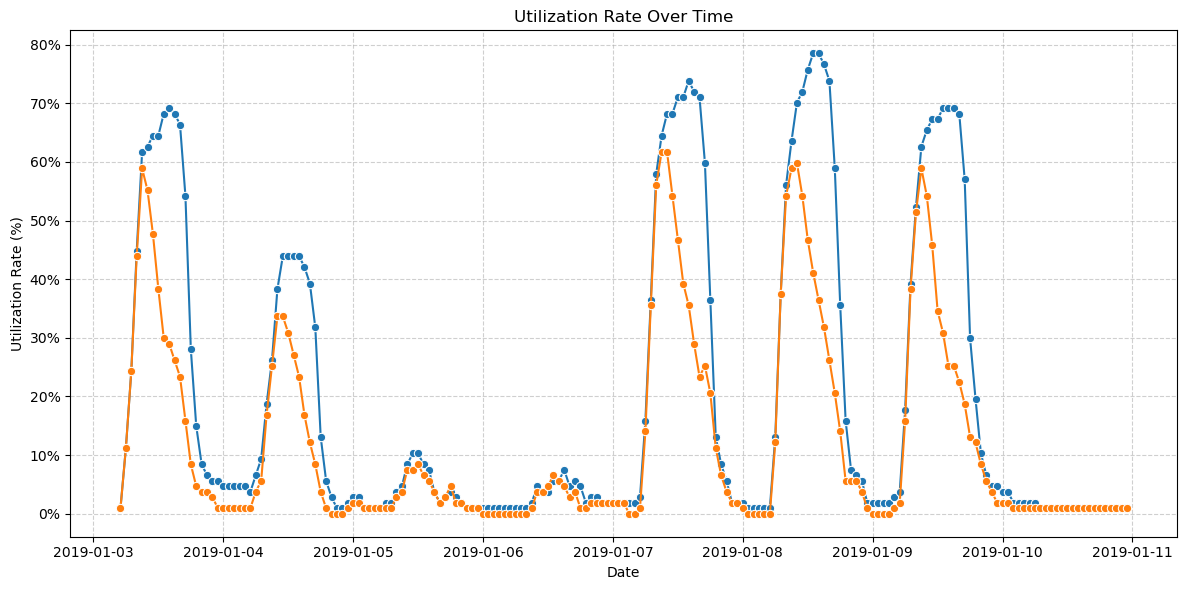

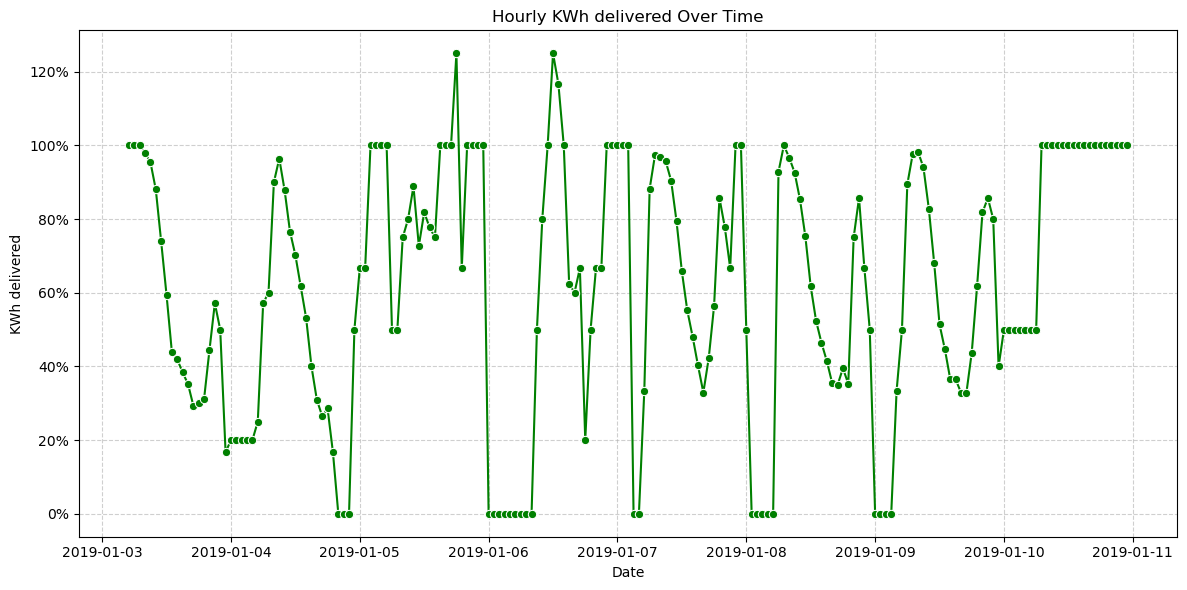

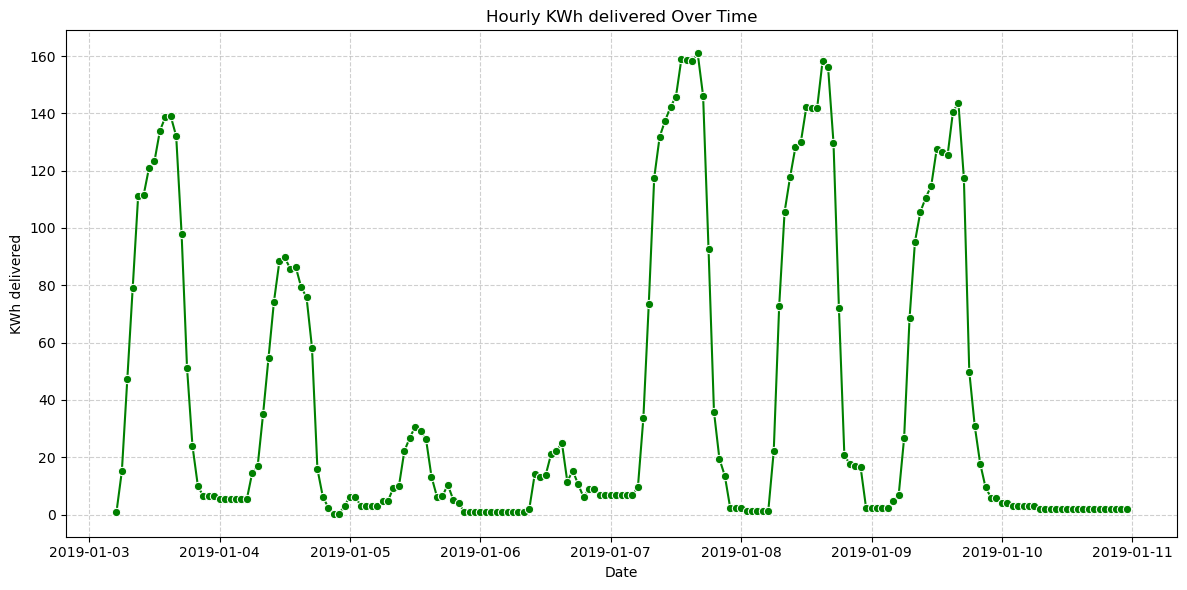

In [151]:
# Settings:
start_time = "2019-01-03"
end_time = "2019-01-10"
time_steps = "h"

df = charging_data_cleaned[(charging_data_cleaned["connectionTime"] >= start_time) & (charging_data_cleaned["connectionTime"] < end_time)]

# Convert input data to DataFrame
df.loc[:, "connectionTime"] = pd.to_datetime(df["connectionTime"]).dt.round(time_steps)
df.loc[:, "disconnectTime"] = pd.to_datetime(df["disconnectTime"]).dt.round(time_steps)
df.loc[:, "doneChargingTime"] = pd.to_datetime(df["doneChargingTime"]).dt.round(time_steps)

# Define the range of hours to analyze
start_time = df["connectionTime"].min()
end_time = df["disconnectTime"].max()
hourly_range = pd.date_range(start=start_time, end=end_time, freq=time_steps)

# Create an empty result DataFrame
result = pd.DataFrame({"datetime": hourly_range})

# Merge the sessions into the hourly range
hourly_sessions = []
for _, row in df.iterrows():
    session_hours = pd.date_range(start=row["connectionTime"], end=row["disconnectTime"], freq=time_steps)
    
    # Calculate kWh delivered per hour with protection against zero duration
    duration_hours = (row["disconnectTime"] - row["connectionTime"]).total_seconds() / 3600.0
    if duration_hours > 0:
        kWh_per_hour = row["kWhDelivered"] / duration_hours
    else:
        kWh_per_hour = 0  # No duration, no charging
    
    for hour in session_hours:
        hourly_sessions.append({
            "datetime": hour,
            "stationID": row["stationID"],
            "isCharging": int(row["doneChargingTime"] >= hour),
            "kWhDelivered": kWh_per_hour
        })

# Create a DataFrame for hourly sessions
hourly_df = pd.DataFrame(hourly_sessions)

# Aggregate data to calculate KPIs
aggregated = hourly_df.groupby("datetime").agg(
    blockedStations=("stationID", "nunique"),  # Count unique station IDs
    chargingStations=("isCharging", "sum"),   # Sum charging stations
    kWhDelivered=("kWhDelivered", "sum")      # Sum kWh delivered
).reset_index()

aggregated["blockedStations"] = aggregated["blockedStations"] / 107
aggregated["chargingStations"] = aggregated["chargingStations"] / 107
aggregated["idleTime"] = aggregated["chargingStations"] / aggregated["blockedStations"]

# Merge the results back to the result DataFrame
result = result.merge(aggregated, on="datetime", how="left").fillna(0)

# Keep only relevant columns
result = result[["datetime", "blockedStations", "chargingStations", "kWhDelivered", "idleTime"]]

# Display the result
display(result.head())

# Display the result

plt.figure(figsize=(12, 6))
sns.lineplot(data=result, x='datetime', y='blockedStations', marker='o', color='tab:blue')
sns.lineplot(data=result, x='datetime', y='chargingStations', marker='o', color='tab:orange')
plt.title('Utilization Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Utilization Rate (%)')
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(data=result, x='datetime', y='idleTime', marker='o', color='green')
plt.title('Hourly KWh delivered Over Time')
plt.xlabel('Date')
plt.ylabel('KWh delivered')
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(data=result, x='datetime', y='kWhDelivered', marker='o', color='green')
plt.title('Hourly KWh delivered Over Time')
plt.xlabel('Date')
plt.ylabel('KWh delivered')
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## b - Key Performance Indicators

Goal is to define 3 KPIs for a dashboard and visualize them over time

1. Define KPIs, e.g.:

    Utilization Rate: Percentage of total available time a charging station is in use.
    -> Highlights how effectively the charging stations are being utilized.

    -> Check

    Idle Time Percentage: Proportion of time stations are occupied but not actively charging.
    -> Identifies inefficiencies and opportunities to improve turnover.

    Peak Hour Utilization: Number of charging sessions started during the busiest hour.
    -> Shows when demand is highest, helping in capacity planning and pricing strategies.

    Other Alternatives:
    kWh delivered: Total sum of kWh delivered in an hour
    
    Average Charging Speed (kWh/hour): Average rate of energy delivery during charging sessions.
    -> Helps monitor equipment performance and customer experience.

    Session Duration: Average time per charging session.
    -> Provides insights into user behavior and informs station scheduling.

    Revenue per kWh (if pricing data available): Average revenue generated per unit of energy delivered. -> No pricing data avalible
    -> Directly ties operational efficiency to financial performance.

    Sessions per Charger: Average number of charging sessions per station over time. -> not good
    -> Measures the distribution of usage across stations and identifies underperforming assets.

    Peak-to-Average Load Ratio: Ratio of peak energy demand to average demand.
    -> Helps identify stress periods on the grid and the need for scaling infrastructure.

    Repeat Customer Ratio: Percentage of unique users returning for multiple sessions.
    -> Indicates customer loyalty and satisfaction with the charging hub.

    Weather Impact Correlation: Relationship between weather (e.g., temperature, rain) and charging demand.
    -> Provides context for fluctuations in usage, enabling better forecasting




2. Combinne KPIs into an Dataframe
3. Plot the KPIs over time

C:\Users\paull\AppData\Local\Temp\ipykernel_18020\3380018738.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  charging_data_2019['hour'] = charging_data_2019['connectionTime'].dt.hour
C:\Users\paull\AppData\Local\Temp\ipykernel_18020\3380018738.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  charging_data_2019['usage_minutes'] = (charging_data_2019['disconnectTime'] - charging_data_2019['connectionTime']).dt.total_seconds() / 60
C:\Users\paull\AppData\Local\Temp\ipykernel_18020\3380018738.py:17: Set

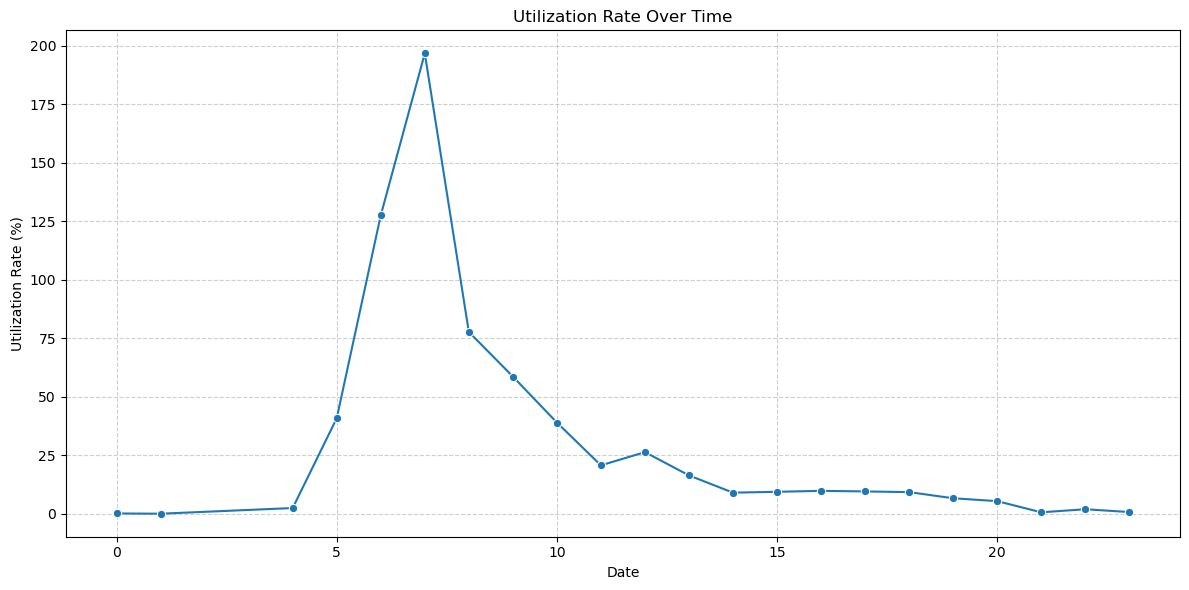

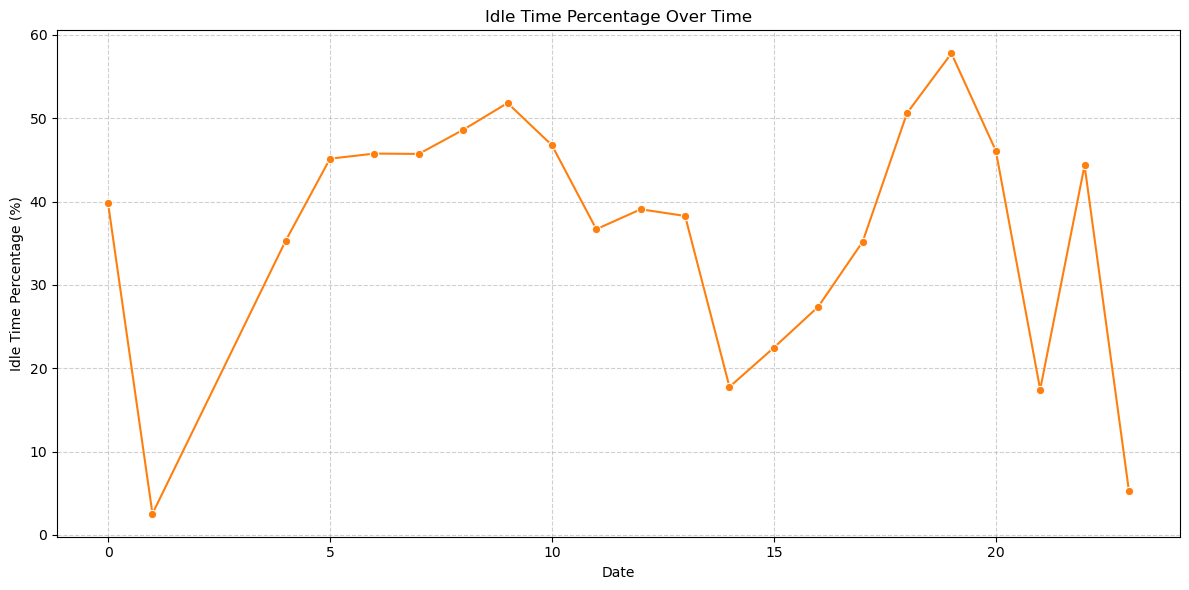

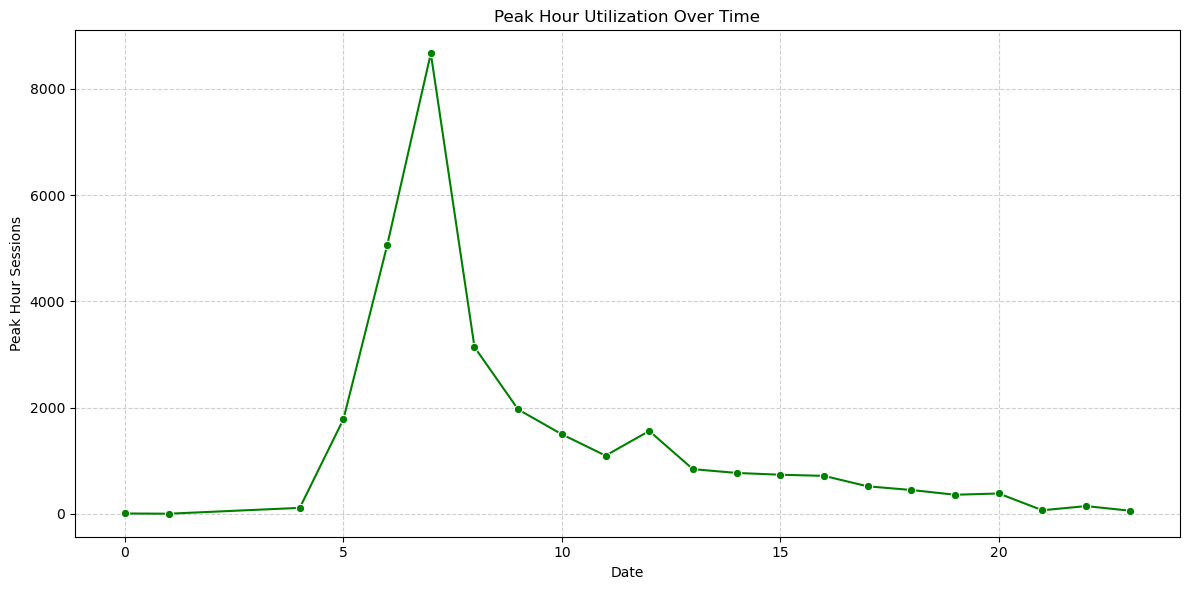

In [107]:
# Task (b): Key Performance Indicators (KPIs)
# Define KPIs
charging_data_2019 = charging_data_cleaned[
    (charging_data_cleaned['connectionTime'].dt.year == 2019) &
    (charging_data_cleaned['connectionTime'].dt.month == 1)
]

# Schritt 1: Spalten vorbereiten
charging_data_2019['hour'] = charging_data_2019['connectionTime'].dt.hour

# Gesamtzeit im Betrachtungszeitraum (pro Tag)
total_stations = charging_data_2019['stationID'].nunique()
total_minutes_per_day = total_stations * 24 * 60

# Gesamtzeit, Ladezeit und Leerlaufzeit berechnen
charging_data_2019['usage_minutes'] = (charging_data_2019['disconnectTime'] - charging_data_2019['connectionTime']).dt.total_seconds() / 60
charging_data_2019['charging_minutes'] = (charging_data_2019['doneChargingTime'] - charging_data_2019['connectionTime']).dt.total_seconds() / 60
charging_data_2019['idle_minutes'] = (charging_data_2019['disconnectTime'] - charging_data_2019['doneChargingTime']).dt.total_seconds() / 60

# Aggregation nach Datum
daily_aggregates = charging_data_2019.groupby('hour').agg(
    used_minutes=('usage_minutes', 'sum'),
    charging_minutes=('charging_minutes', 'sum'),
    idle_minutes=('idle_minutes', 'sum'),
    peak_hour_sessions=('kWhDelivered', 'sum')
)


# KPIs berechnen
daily_aggregates['utilization_rate'] = (daily_aggregates['used_minutes'] / total_minutes_per_day) * 100
daily_aggregates['idle_time_percentage'] = (daily_aggregates['idle_minutes'] / daily_aggregates['used_minutes']) * 100
daily_aggregates['peak_hour_utilization'] = daily_aggregates['peak_hour_sessions']

# Schritt 2: DataFrame für die Zeitreihen-Analyse vorbereiten
kpi_df = daily_aggregates.reset_index()[['hour', 'utilization_rate', 'idle_time_percentage', 'peak_hour_utilization']]
kpi_df.head()

# Plot 1: Utilization Rate
plt.figure(figsize=(12, 6))
sns.lineplot(data=kpi_df, x='hour', y='utilization_rate', marker='o', color='tab:blue')
plt.title('Utilization Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Utilization Rate (%)')
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Plot 2: Idle Time Percentage
plt.figure(figsize=(12, 6))
sns.lineplot(data=kpi_df, x='hour', y='idle_time_percentage', marker='o', color='tab:orange')
plt.title('Idle Time Percentage Over Time')
plt.xlabel('Date')
plt.ylabel('Idle Time Percentage (%)')
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Plot 3: Peak Hour Utilization
plt.figure(figsize=(12, 6))
sns.lineplot(data=kpi_df, x='hour', y='peak_hour_utilization', marker='o', color='green')
plt.title('Peak Hour Utilization Over Time')
plt.xlabel('Date')
plt.ylabel('Peak Hour Sessions')
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


## ToDo hourly
## Varify KPIs
## show values


## c - Site Characteristics

#### Public vs. private charging hubs
In order to find out which of the two sites is the public one, we first have to clarefy caracteristics of private and public charging hubs and what we think how they differ:
1. Public Charging Hubs:
    - __User patterns__: Public Hubs likely serve a more broad and transistant user base with a higher number of unique users. The sessions per user might be lower, because users use the charging stations occasionally (e.g. at trips).
    - __Energy consumtion__: The total Energy delivered ist most likely higher due to the larger number of users, while the energy delivered per session is likely smaller becuse User only charge whats necessary.
    - __Infrastructure__: The number of stations is higher to accomodate more users. That for the sessions per station could be lower due to more destribution.
    - __Session timing__: The usage might align with travel times (e.g. middays or weekends). Because Users typicly only "top up" their cars instead of charging it full the average charging time is most likely shorter.
2. Private Charging Hubs:
    - __User patterns__: Pivate Hubs likely serve a specific user group, such as employees. There are likely less individual users but higher sessions per user due to frequent use by the same people
    - __Energy consumtion__: The total Energy delivered ist most likely lower, while the energy delivered per session is likely higher due to fewer but longer sessions.
    - __Infrastructure__: Fewer stations but higher sessions per station, as usage is split among a smaller group.
    - __Session timing__: The usage might align with regular schedules (e.g. working). The average charging durations are kikely longer, as users might leave their vehicles for extended periods, like during work.

#### Data analysis strategy
To find out which of the sites is public we will look at specific Metrics per site, explore seasonal patterns and look at differences in operation.

##### 1. Metrics

In [110]:
site_data = charging_data_cleaned.groupby('siteID').agg({
    'kWhDelivered': ['mean', 'sum', 'count'],
    'userID': 'nunique',
    'stationID': 'nunique',
    'charging_duration': 'mean'
})

# Rename columns
site_data.columns = ['Avg_kWh_Delivered', 'Total_kWh_Delivered', 'Total_Sessions', 'Unique_Users', 'Unique_Stations', 'Avg_Charging_Duration']

# Calculate Metrics
valid_sessions = charging_data_cleaned[charging_data_cleaned['userID'].notnull()]
valid_session_counts = valid_sessions.groupby('siteID').size()

site_data['Sessions_per_User'] = valid_session_counts / site_data['Unique_Users']
site_data['Sessions_per_Station'] = site_data['Total_Sessions'] / site_data['Unique_Stations']

display(site_data)

,Avg_kWh_Delivered,Total_kWh_Delivered,Total_Sessions,Unique_Users,Unique_Stations,Avg_Charging_Duration,Sessions_per_User,Sessions_per_Station
siteID,,,,,,,,
1,14.063273,492608.311782,35028,523,52,237.653153,66.975143,673.615385
2,9.251384,289605.331753,31304,572,55,175.025816,54.727273,569.163636


##### Observations:
We can observe the following from the site Data:
- Unique Users: Higher unique users suggest site 2 being a public hub.
- Sessions per User: Lower sessions per user suggest a public hub, while higher values point to a private hub, pointing to the same conclusion as the unique users.
- Charging Duration: Shorter durations suggest site 2 being a public hub, as users don’t stay long.
- Energy Delivered: Higher average energy per session suggests site 1 being a private hub.
The metrics suggest that site 1 is the private one and site to being the orivate one. To make sure, we look at Time-Based patterns.

##### 2. Time-Based Patterns

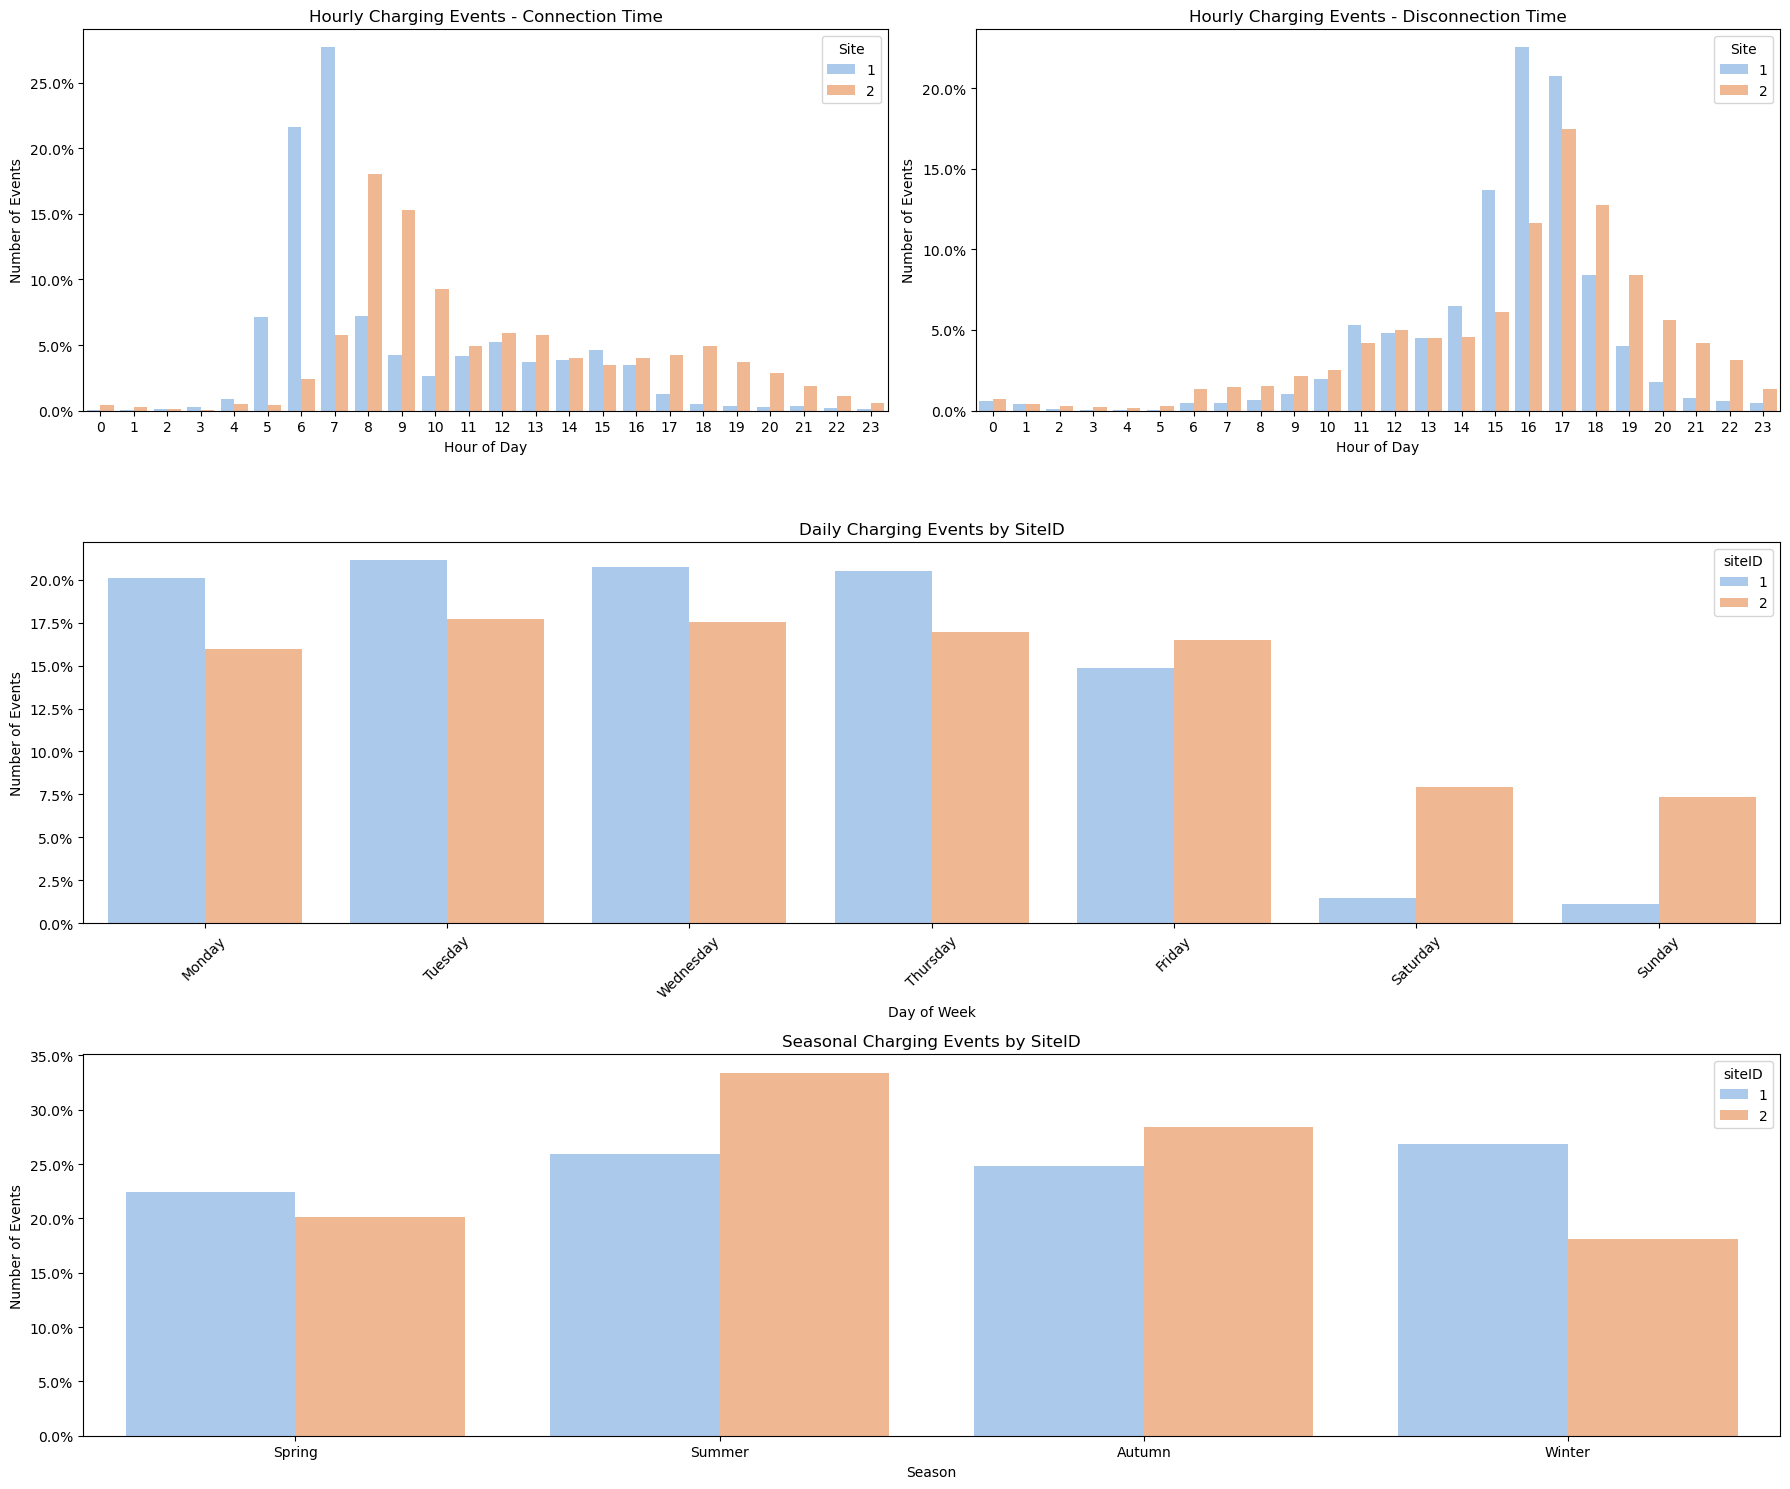

In [119]:
# Berechne die Gesamtanzahl der Events pro Standort (siteID)
total_events_site = charging_data_cleaned.groupby('siteID').size().reset_index(name='TotalEvents')

# Berechne die relativen Werte für hourly_pattern_site
hourly_pattern_site = charging_data_cleaned.groupby(['hourstart', 'siteID']).size().reset_index(name='Events')
hourly_pattern_site = hourly_pattern_site.merge(total_events_site, on='siteID')
hourly_pattern_site['RelativeEvents'] = hourly_pattern_site['Events'] / hourly_pattern_site['TotalEvents']

# Berechne die relativen Werte für hourly_pattern_end_site
hourly_pattern_end_site = charging_data_cleaned.groupby(['hourend', 'siteID']).size().reset_index(name='Events')
hourly_pattern_end_site = hourly_pattern_end_site.merge(total_events_site, on='siteID')
hourly_pattern_end_site['RelativeEvents'] = hourly_pattern_end_site['Events'] / hourly_pattern_end_site['TotalEvents']

# Berechne die relativen Werte für daily_pattern_site
daily_pattern_site = charging_data_cleaned.groupby(['day_of_week', 'siteID']).size().reset_index(name='Events')
daily_pattern_site = daily_pattern_site.merge(total_events_site, on='siteID')
daily_pattern_site['RelativeEvents'] = daily_pattern_site['Events'] / daily_pattern_site['TotalEvents']

# Berechne die relativen Werte für seasonal_pattern_site
seasonal_pattern_site = charging_data_cleaned.groupby(['season', 'siteID']).size().reset_index(name='Events')
seasonal_pattern_site = seasonal_pattern_site.merge(total_events_site, on='siteID')
seasonal_pattern_site['RelativeEvents'] = seasonal_pattern_site['Events'] / seasonal_pattern_site['TotalEvents']

# Plot
plt.figure(figsize=(18, 15))

# First Plot: Hourly connetion and disconnection events for each siteID
plt.subplot(3, 2, 1)
sns.barplot(data=hourly_pattern_site, x='hourstart', y='RelativeEvents', hue='siteID', palette='pastel')
plt.title('Hourly Charging Events - Connection Time')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Events')
plt.legend(title='SiteID', loc='upper right')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

plt.subplot(3, 2, 2)
sns.barplot(data=hourly_pattern_end_site, x='hourend', y='RelativeEvents', hue='siteID', palette='pastel')
plt.title('Hourly Charging Events - Disconnection Time')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Events')
plt.legend(title='SiteID', loc='upper right')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

# Secound Plot: Daily Charging Events for each siteID
plt.subplot(3, 1, 2)
sns.barplot(data=daily_pattern_site, x='day_of_week', y='RelativeEvents', hue='siteID', palette='pastel', order=day_order)
plt.title('Daily Charging Events by SiteID')
plt.xlabel('Day of Week')
plt.ylabel('Number of Events')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

# Third Plot: Seasonal Charging Events for each siteID
plt.subplot(3, 1, 3)
sns.barplot(data=seasonal_pattern_site, x='season', y='RelativeEvents', hue='siteID', palette='pastel', order=month_order)
plt.title('Seasonal Charging Events by SiteID')
plt.xlabel('Season')
plt.ylabel('Number of Events')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

# Layout anpassen
plt.tight_layout()
plt.show()

# Check data hole

##### Observations:
The analysis of time pattern support the privious obserations that site one is the private and site two the public one.
1. Site 1: The hourly and daily Charging events show a work related pattern. Connection an disconnection times show are in highest between 7am and 4pm and the site is much more used on weekdays. The seasonal distribution shows no sicnificant pattern.
2. Site 2: The patterns seem to be more travel related. Connection/disconnection time is later on average and there are more connections on weekends. The site is mostly used in Summer

#### Conclusion
After we looked at the caracteristics and operations of public and povate charging hubs, developing an data analytics strategy based on the findings and executing it, we found, that site 1 ist likely the private and site 2 the public charging hub.